In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import scipy.interpolate as spi
import math
import matplotlib.figure as fig
from scipy import stats

In [181]:
data1 = pd.read_csv("FilesEj1/OutputEj1_1.csv")
data2 = pd.read_csv("FilesEj1/OutputEj1_2.csv")
data3 = pd.read_csv("FilesEj1/OutputEj1_3.csv")
data4 = pd.read_csv("FilesEj1/OutputEj1_4.csv")

0.2


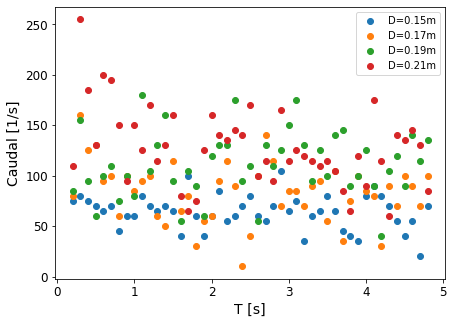

In [182]:
dt = data1['Dt'][1]
print(dt)

counts1 = data1['N']/dt
counts2 = data2['N']/dt
counts3 = data3['N']/dt
counts4 = data4['N']/dt
counts1 = counts1[1:-1:1]
counts2 = counts2[1:-1:1]
counts3 = counts3[1:-1:1]
counts4 = counts4[1:-1:1]

parameters = {'xtick.labelsize': 12,'ytick.labelsize': 12, 'axes.labelsize': 14}
plt.rcParams.update(parameters)
plt.figure(figsize=(7,5))
plt.scatter(data1['Dt'][1:-1:1], counts1, label = "D=0.15m")
plt.scatter(data2['Dt'][1:-1:1], counts2, label = "D=0.17m")
plt.scatter(data3['Dt'][1:-1:1], counts3, label = "D=0.19m")
plt.scatter(data4['Dt'][1:-1:1], counts4, label = "D=0.21m")
plt.xlabel("T [s]")
plt.ylabel("Caudal [1/s]")
plt.legend()


In [183]:
#calcular los promedios de caudales para cada D
def get_values(array):
    caudal_promedio = array.mean()
    max = array.max()
    min = array.min()
    return caudal_promedio, max, min

64.14893617021276
83.61702127659575
111.27659574468085
128.29787234042553


Text(0, 0.5, 'Caudal [1/s]')

<Figure size 504x360 with 0 Axes>

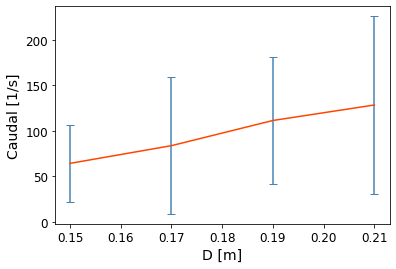

In [184]:
cp1, max1, min1 = get_values(counts1)
cp2, max2, min2 = get_values(counts2)
cp3, max3, min3 = get_values(counts3)
cp4, max4, min4 = get_values(counts4)
print(cp1)
print(cp2)
print(cp3)
print(cp4)
array_x = [0.15, 0.17, 0.19, 0.21]
array_y = [cp1, cp2, cp3, cp4]
y_errs = [max1-min1, max2-min2, max3-min3, max4-min4]
parameters = {'xtick.labelsize': 12,'ytick.labelsize': 12, 'axes.labelsize': 14}
plt.rcParams.update(parameters)
plt.figure(figsize=(7,5))
plt.subplots()
plt.errorbar(np.array(array_x), np.array(array_y), yerr=np.array(y_errs)/2, capsize=4, color="orangered", ecolor="steelblue")
plt.xlabel("D [m]")
plt.ylabel("Caudal [1/s]")

In [185]:
def getBeverloo(c, i):
    np = 300/0.3
    return np * math.sqrt(9.8) * (array_x[i] - (c * 0.0125))**1.5

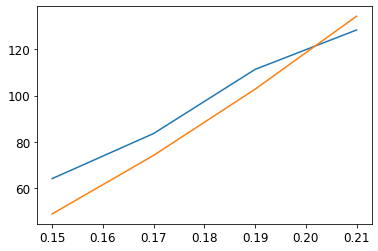

In [186]:
plt.plot(array_x, array_y)
curva1 = [getBeverloo(7,0), getBeverloo(7,1), getBeverloo(7,2), getBeverloo(7,3)]
plt.plot(array_x, curva1)

6.670579999898898


Text(0, 0.5, 'ECM')

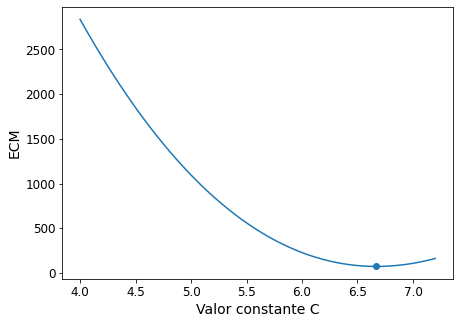

In [187]:
Ds = []
ecm = []
c = []
min_sum = 99999999999
min_C = 0
paso = 1/100000
i = 4
while i<7.2:
    c.append(i)
    sum = 0
    for j in range(len(array_x)):
        # sum += (array_y[j] - (2 *(array_x[j] / 1000) * paso * i))**2
        sum += (array_y[j] - getBeverloo(i, j))**2
    sum = sum/4
    ecm.append(sum)
    if sum < min_sum:
        min_sum = sum
        min_C = i
    i+=paso
print(min_C)

parameters = {'xtick.labelsize': 12,'ytick.labelsize': 12, 'axes.labelsize': 14}
plt.rcParams.update(parameters)
plt.figure(figsize=(7,5))
plt.plot(c, ecm)
plt.xlabel("C")
plt.ylabel("E(C)")
plt.scatter([min_C], [min_sum])
plt.xlabel("Valor constante C")
plt.ylabel("ECM")